In [3]:
import pandas as pd
import numpy as np

Load datasets

In [4]:
# Load datasets
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')
credit_data = pd.read_csv('../data/creditcard.csv')

In [12]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


Check for missing values

In [9]:
# Check for missing values
fraud_missing = fraud_data.isnull().sum()
credit_missing = credit_data.isnull().sum()
ip_missing = ip_data.isnull().sum()

In [7]:
fraud_missing

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [8]:
credit_missing

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
ip_missing

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [13]:
# Impute missing values for fraud_data
fraud_data['age'].fillna(fraud_data['age'].median(), inplace=True)
fraud_data['browser'].fillna(fraud_data['browser'].mode()[0], inplace=True)


C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_25440\924222052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_data['age'].fillna(fraud_data['age'].median(), inplace=True)
C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_25440\924222052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [14]:
# Drop rows with missing 'purchase_value'
fraud_data.dropna(subset=['purchase_value'], inplace=True)

# Similarly, handle missing values for credit_data
credit_data.fillna(credit_data.median(), inplace=True)

In [15]:
# Remove duplicates
fraud_data.drop_duplicates(inplace=True)
credit_data.drop_duplicates(inplace=True)

# Correct data types for 'signup_time' and 'purchase_time'
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Check data types after conversion
print(fraud_data.dtypes)

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


Exploratory Data Analysis

Univariate analysis

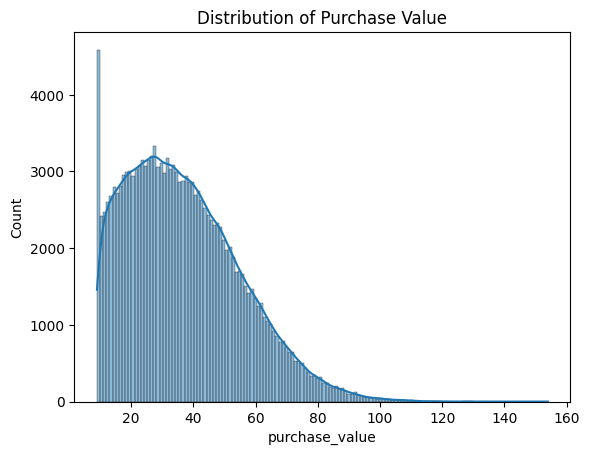

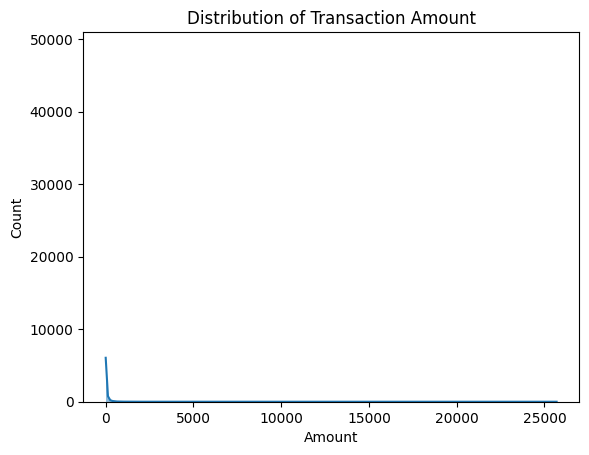

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis on fraud_data
sns.histplot(fraud_data['purchase_value'], kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

# Univariate analysis on credit_data (Transaction Amount)
sns.histplot(credit_data['Amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

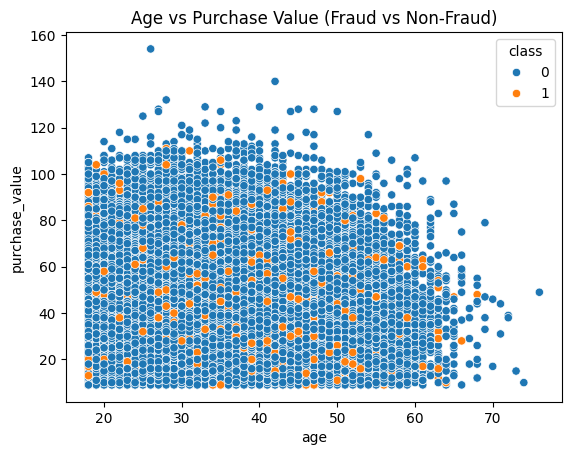

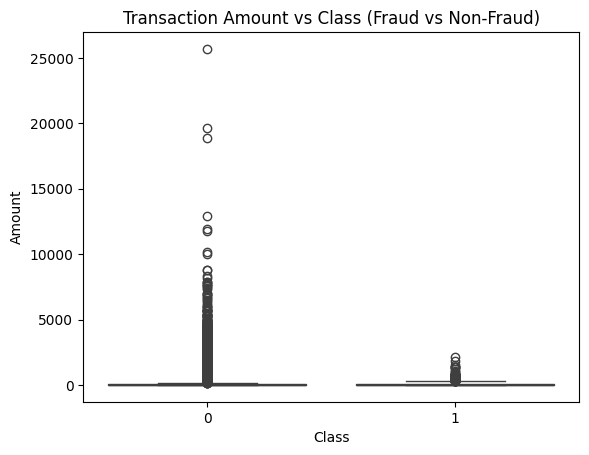

In [18]:
# Bivariate analysis: purchase_value vs age (fraud_data)
sns.scatterplot(x='age', y='purchase_value', hue='class', data=fraud_data)
plt.title('Age vs Purchase Value (Fraud vs Non-Fraud)')
plt.show()

# Bivariate analysis: Amount vs Class (credit_data)
sns.boxplot(x='Class', y='Amount', data=credit_data)
plt.title('Transaction Amount vs Class (Fraud vs Non-Fraud)')
plt.show()


In [21]:
# Function to convert IP to integer
import ipaddress
# Convert IP addresses to string and handle missing values
fraud_data['ip_address'] = fraud_data['ip_address'].fillna('0.0.0.0').astype(str)



def ip_to_int(ip):
    # return int(ipaddress.ip_address(ip))
    try:
        return int(''.join([f'{int(i):08b}' for i in ip.split('.')]), 2)
    except ValueError:
        return 0  # Default value for malformed IPs

# Convert IP addresses in fraud_data
fraud_data['ip_int'] = fraud_data['ip_address'].apply(ip_to_int)

# Merge with IP Address to Country mapping
# ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].apply(ip_to_int)
# ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].apply(ip_to_int)

ip_data = ip_data.sort_values(by='lower_bound_ip_address')
ip_data = ip_data.sort_values(by='upper_bound_ip_address')
# Merge based on IP range
fraud_data = pd.merge(fraud_data, ip_data, how='left', 
                      left_on='ip_int', 
                      right_on='lower_bound_ip_address')

# Drop unnecessary columns
fraud_data.drop(['lower_bound_ip_address', 'upper_bound_ip_address'], axis=1, inplace=True)


In [22]:
print(fraud_data.head())

   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age        ip_address  class  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368.79972      0   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  350311387.865908      0   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820.11095      1   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443.91396      0   
4  NAUITBZFJKHWW    Ads  Safari   M   45  415583117.452712      0   

            ip_int country  
0   96044104890468     NaN  
1  367328113800820     NaN  
2   42950227077975     NaN  
3  503387579180292     NaN  
4  217885241698408 

In [23]:
# Feature Engineering
# Transaction frequency and velocity
fraud_data['transaction_time_diff'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds()

# Frequency of transactions per user
fraud_data['transaction_count'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')

# Time-based features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek


In [25]:
# Normalization and Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler for fraud_data
scaler = StandardScaler()
fraud_data[['purchase_value', 'age']] = scaler.fit_transform(fraud_data[['purchase_value', 'age']])

# For creditcard.csv
credit_data[['Amount']] = scaler.fit_transform(credit_data[['Amount']])


In [26]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

# Label encode 'browser', 'source', and 'sex'
le = LabelEncoder()

fraud_data['browser'] = le.fit_transform(fraud_data['browser'])
fraud_data['source'] = le.fit_transform(fraud_data['source'])
fraud_data['sex'] = le.fit_transform(fraud_data['sex'])
